# Text and categorical data problems

1) Membership Constraints

2) Categorical Variables

3) Cleaning text data

In [ ]:
"""

Categorical and text data can often be some of the messiest parts of a dataset due to their 
unstructured nature. In this chapter, you’ll learn how to fix whitespace and capitalization 
inconsistencies in category labels, collapse multiple categories into one, and reformat strings 
for consistency.



"""

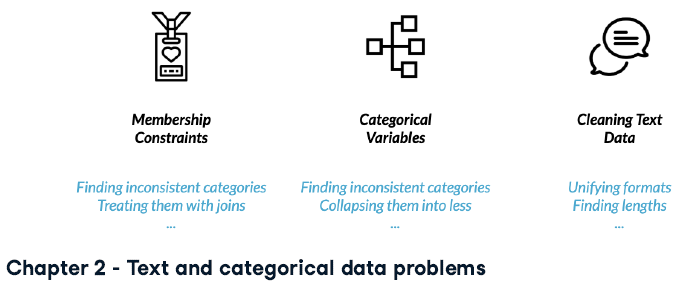

## Membership Contraints

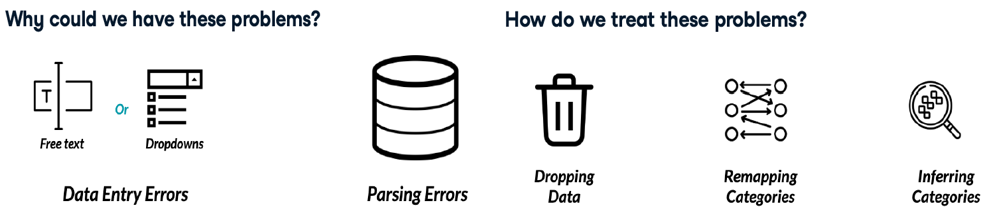

In [5]:
import pandas as pd

study_data = pd.read_csv('./Data/study.csv', index_col = 0)
print(study_data.head(8))

    name    birthday blood_type
1    Ian  10/25/2019         B-
2    Sam    5/6/2018         A-
3    Pam   4/19/2016         O+
4    Tom    9/6/2012         O-
5  Sarah    7/9/2011         Z+
6   Suzy    3/8/2010         A+
7    Tim    5/8/2009        AB+


In [8]:
categories = pd.read_csv('./Data/categories.csv', index_col = 0)
print(categories.head(7))

  blood_type
1         O-
2         O+
3         A-
4         A+
5         B+
6         B-
7        AB+


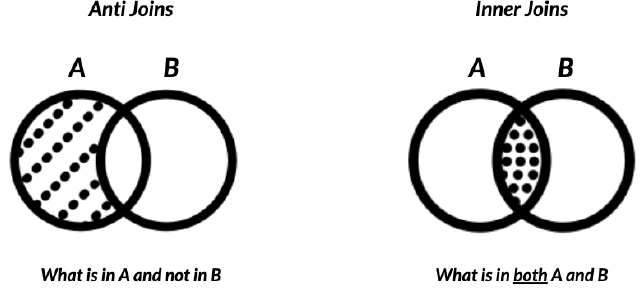

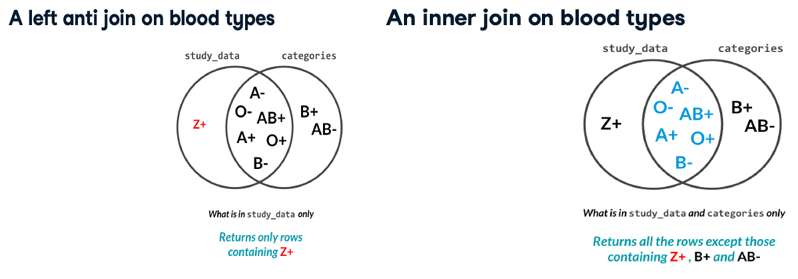

### Finding inconsistent categories

In [9]:
# Left Anti-Join

inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
print(inconsistent_categories)

"""
We first get all inconsistent categories in the blood_type column of the 
study_data DataFrame. We do that by creating a set out of the blood_type 
column which stores its unique values, and use the difference method which 
takes in as argument the blood_type column from the categories DataFrame. 
This returns all the categories in blood_type that are not in categories. 


"""

{'Z+'}


In [16]:
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
study_data[inconsistent_rows]


"""
We then find the inconsistent rows by finding all the rows of the blood_type
columns that are equal to inconsistent categories by using the isin method, 
this returns a series of boolean values that are True for inconsistent rows 
and False for consistent ones. We then subset the study_data DataFrame based
on these boolean values, and voila we have our inconsistent data.
"""


,name,birthday,blood_type
5,Sarah,7/9/2011,Z+


### Dropping inconsistent categories

In [19]:
inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
inconsistent_data = study_data[inconsistent_rows]
# Drop inconsistent categories and get consistent data only
consistent_data = study_data[~inconsistent_rows]
print(consistent_data)

# """
# To drop inconsistent rows and keep ones that are only consistent. We just 
# use the tilde symbol while subsetting which returns everything except 
# inconsistent rows.

# """

   name    birthday blood_type
1   Ian  10/25/2019         B-
2   Sam    5/6/2018         A-
3   Pam   4/19/2016         O+
4   Tom    9/6/2012         O-
6  Suzy    3/8/2010         A+
7   Tim    5/8/2009        AB+


In [20]:
#--------------------------------------------------------#

In [30]:
# import pandas as pd

# airlines_final = pd.read_csv('./Data/airlines_final.csv', index_col = 0)
# print(airlines_final.head(3))

In [31]:
# airlines = airlines_final.loc[:, ["id", "day", "airline", "destination", "dest_region",
#                                  "dest_size", "boarding_area", "dept_time", "wait_min"]]

# print(airlines.head())

In [32]:
# categories = airlines_final.loc[:,["cleanliness", "safety", "satisfaction"]]
# print(categories.head())

### Finding & Dropping inconsistent values

In [33]:
# cat_clean = set(airlines["cleanliness"]).difference(categories["cleanliness"])

In [ ]:
"""

In this exercise, you will use both of these DataFrames to find survey 
answers with inconsistent values, and drop them, effectively performing 
an outer and inner join on both these DataFrames 


"""

In [40]:
import pandas as pd

airlines_final = pd.read_csv('./Data/airlines_final.csv', index_col = 0)
print(airlines_final.head(3))

     id       day      airline        destination    dest_region dest_size  \
0  1351   Tuesday  UNITED INTL             KANSAI           Asia       Hub   
1   373    Friday       ALASKA  SAN JOSE DEL CABO  Canada/Mexico     Small   
2  2820  Thursday        DELTA        LOS ANGELES        West US       Hub   

  boarding_area   dept_time  wait_min cleanliness         safety  \
0  Gates 91-102  2018-12-31     115.0       Clean        Neutral   
1   Gates 50-59  2018-12-31     135.0       Clean      Very safe   
2   Gates 40-48  2018-12-31      70.0     Average  Somewhat safe   

     satisfaction  
0  Very satisfied  
1  Very satisfied  
2         Neutral  


In [44]:
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines_final['cleanliness'].unique(), "\n")
print('Safety: ', airlines_final['safety'].unique(), "\n")
print('Satisfaction: ', airlines_final['satisfaction'].unique(), "\n")

         cleanliness         safety        satisfaction
0              Clean        Neutral      Very satisfied
1              Clean      Very safe      Very satisfied
2            Average  Somewhat safe             Neutral
3              Clean      Very safe  Somewhat satsified
4     Somewhat clean      Very safe  Somewhat satsified
...              ...            ...                 ...
2804  Somewhat clean        Neutral  Somewhat satsified
2805           Clean      Very safe      Very satisfied
2806           Clean      Very safe      Very satisfied
2807           Clean  Somewhat safe      Very satisfied
2808           Clean      Very safe  Somewhat satsified

[2477 rows x 3 columns]
Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [45]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines_final["cleanliness"]).difference(categories["cleanliness"])

# Find rows with that category
cat_clean_rows = airlines_final['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines_final[cat_clean_rows])

print(categories)

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []
         cleanliness         safety        satisfaction
0              Clean        Neutral      Very satisfied
1              Clean      Very safe      Very satisfied
2            Average  Somewhat safe             Neutral
3              Clean      Very safe  Somewhat satsified
4     Somewhat clean      Very safe  Somewhat satsified
...              ...            ...                 ...
2804  Somewhat clean        Neutral  Somewhat satsified
2805           Clean      Very safe      Very satisfied
2806           Clean      Very safe      Very satisfied
2807           Clean  Somewhat safe      Very satisfied
2808           Clean      Very safe  Somewhat satsified

[2477 rows x 3 columns]


In [48]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines_final['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines_final['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines_final[cat_clean_rows].head())

# Print rows with consistent categories only
print(airlines[~cat_clean_rows].head())

Empty DataFrame
Columns: [id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []
     id        day      airline        destination    dest_region dest_size  \
0  1351    Tuesday  UNITED INTL             KANSAI           Asia       Hub   
1   373     Friday       ALASKA  SAN JOSE DEL CABO  Canada/Mexico     Small   
2  2820   Thursday        DELTA        LOS ANGELES        West US       Hub   
3  1157    Tuesday    SOUTHWEST        LOS ANGELES        West US       Hub   
4  2992  Wednesday     AMERICAN              MIAMI        East US       Hub   

  boarding_area   dept_time  wait_min  
0  Gates 91-102  2018-12-31     115.0  
1   Gates 50-59  2018-12-31     135.0  
2   Gates 40-48  2018-12-31      70.0  
3   Gates 20-39  2018-12-31     190.0  
4   Gates 50-59  2018-12-31     559.0  


## Categorical variables

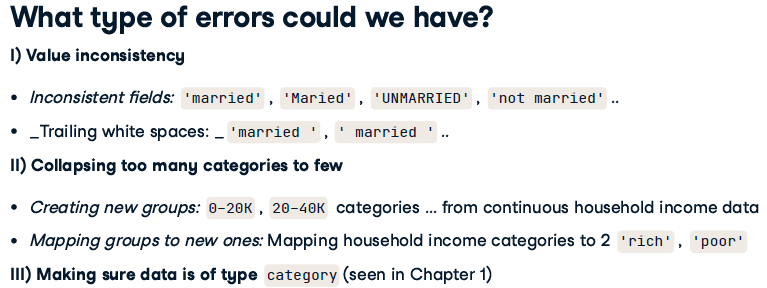

### Value Inconsistency

1) Capitalization (upper/lower case)

2) Strip All spaces

In [49]:
# Since the data file was missing, I posted notes' screenshots

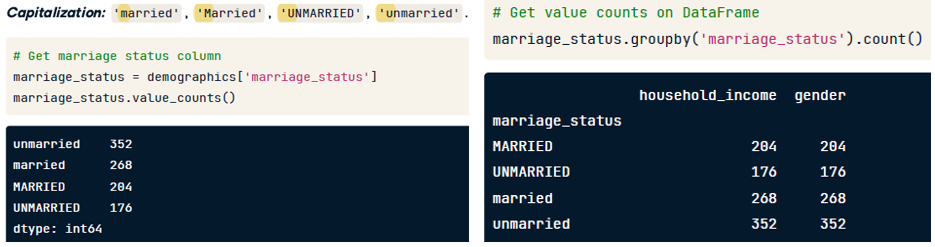

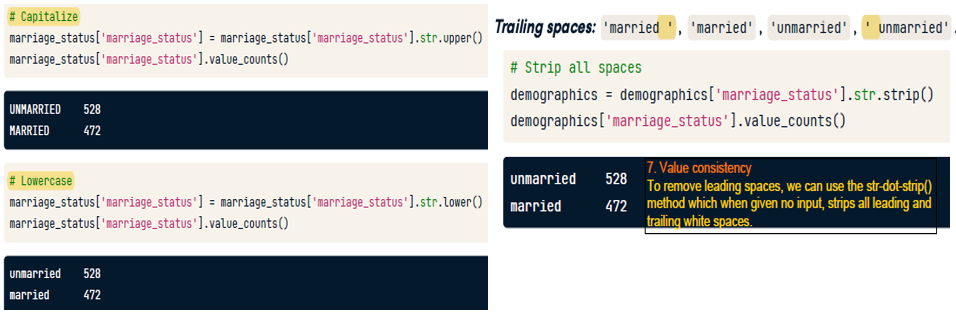

## Collapsing data into categories

### Inconsistent categories

In [61]:
"""
Note: We will be using "airlines_final.csv" file

In this exercise, you will examine two categorical columns from this 
DataFrame, dest_region and dest_size respectively, assess how to address
them and make sure that they are cleaned and ready for analysis. 


"""

In [63]:
# Print unique values of both columns

print(airlines_final['dest_region'].unique())
print(airlines_final['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


In [64]:
# Lower dest_region column and then replace "eur" with "europe"

airlines_final['dest_region'] = airlines_final['dest_region'].str.lower()
airlines_final['dest_region'] = airlines_final['dest_region'].replace({'eur':'europe'})

In [65]:
# Remove white spaces from `dest_size`
airlines_final['dest_size'] = airlines_final['dest_size'].str.strip()

# Verify changes have been effected
print(airlines_final['dest_region'].unique())
print(airlines_final['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


### Remapping categories

In [67]:
# Create ranges for categories
import numpy as np

label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines_final['wait_type'] = pd.cut(airlines_final['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines_final['day_week'] = airlines_final['day'].replace(mappings)

## Cleaning text data

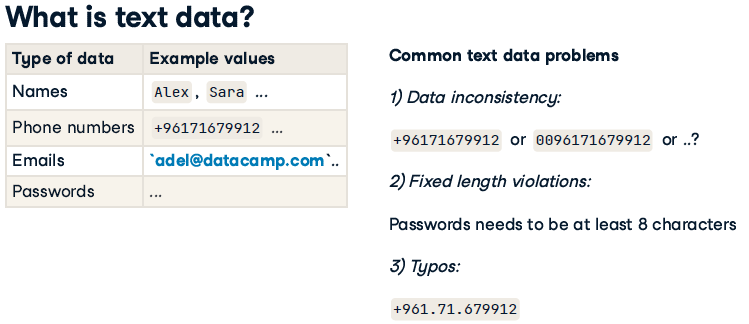

In [76]:
import pandas as pd

phones = pd.read_csv('./Data/phones.csv', index_col = 0)
print(phones)

   Full Name      phone number
0  Ian Adams  001-702-397-5143
1   John Ron  001-702-397-5144
2   Ron Duck  001-702-397-5145
3   Sam Ryan   +1-702-397-5145
4   Ryan Hog  001-702-397-5876
5   Hog Brad              4123
6  Brad Pitt  001-702-397-5149
7  Mike Ross  001-702-397-5150
8   Ross Nik  001-702-397-5151
9   Nik Poss  001-702-397-5152


### Fixing the phone number column

In [75]:
# Replace "+" with "00"

phones["phone number"] = phones["phone number"].str.replace("`+", "00")
phones

C:\Users\Imran\AppData\Local\Temp/ipykernel_1284/321888070.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  phones["phone number"] = phones["phone number"].str.replace("`+", "00")


,Full Name,phone number
0,Ian Adams,001-702-397-5143
1,John Ron,001-702-397-5144
2,Ron Duck,001-702-397-5145
3,Sam Ryan,+1-702-397-5145
4,Ryan Hog,001-702-397-5876
5,Hog Brad,4123
6,Brad Pitt,001-702-397-5149
7,Mike Ross,001-702-397-5150
8,Ross Nik,001-702-397-5151
9,Nik Poss,001-702-397-5152


In [78]:
# Replace phone numbers with lower than 10 digits to NaN

digits = phones['phone number'].str.len()
phones.loc[digits < 10, "phone number"] = np.nan
phones

,Full Name,phone number
0,Ian Adams,001-702-397-5143
1,John Ron,001-702-397-5144
2,Ron Duck,001-702-397-5145
3,Sam Ryan,+1-702-397-5145
4,Ryan Hog,001-702-397-5876
5,Hog Brad,NaN
6,Brad Pitt,001-702-397-5149
7,Mike Ross,001-702-397-5150
8,Ross Nik,001-702-397-5151
9,Nik Poss,001-702-397-5152


### Fixing the phone number column

In [81]:
# Find length of each row in Phone number column
sanity_check = phones['phone number'].str.len()

In [85]:
# Assert minmum phone number length is 10
assert sanity_check.min() >= 10

In [87]:
# Assert all numbers do not have "+" or "-"
# assert phones['phone number'].str.contains("+|-").any() == False

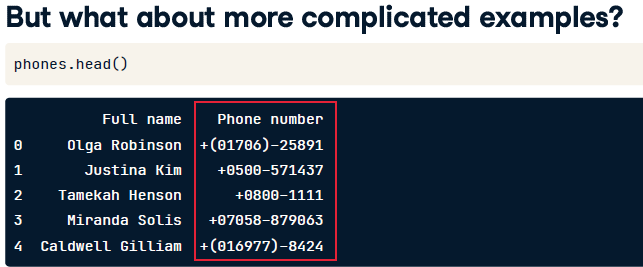

### Regular expressions in action

In [88]:
# Replace letters with nothing
phones['phone number'] = phones['phone number'].str.replace(r'\D+', '')
phones.tail()

C:\Users\Imran\AppData\Local\Temp/ipykernel_1284/1714784585.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  phones['phone number'] = phones['phone number'].str.replace(r'\D+', '')


,Full Name,phone number
5,Hog Brad,NaN
6,Brad Pitt,0017023975149
7,Mike Ross,0017023975150
8,Ross Nik,0017023975151
9,Nik Poss,0017023975152
